In [226]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [227]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [228]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


In [229]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [230]:
clf.score(X_test, y_test)

0.9736842105263158

In [231]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [232]:
import numpy as np

def tpr(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fn = np.sum((y_pred != class_label) & (y_true == class_label))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def fpr(y_pred, y_true, class_label):
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    tn = np.sum((y_pred != class_label) & (y_true != class_label))
    return fp / (fp + tn) if (fp + tn) > 0 else 0.0

def precision(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall(y_pred, y_true, class_label):
    return tpr(y_pred, y_true, class_label)  # same as TPR

def f1score(y_pred, y_true, class_label):
    p = precision(y_pred, y_true, class_label)
    r = recall(y_pred, y_true, class_label)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0


In [233]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [234]:
y_score = clf.predict_proba(X_test)[:, 1] # target values
_, _, thresholds = roc_curve(y_test, y_score, pos_label=1)


In [235]:
results = []
y_pred = clf.predict(X_test)
for class_label in np.unique(y_test):
    label_name = iris.target_names[class_label]
    true_p = tpr(y_pred, y_test, class_label)
    false_p = fpr(y_pred, y_test, class_label)
    prec = precision(y_pred, y_test, class_label)
    rec = recall(y_pred, y_test, class_label)
    f = f1score(y_pred, y_test, class_label)

    results.append({
        "Class": label_name,
        "TPR (Recall)": round(true_p, 3),
        "FPR": round(false_p, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1 Score": round(f, 3)
    })

# --- Convert to Table ---
df_results = pd.DataFrame(results)
print(df_results)


        Class  TPR (Recall)    FPR  Precision  Recall  F1 Score
0      setosa         1.000  0.000        1.0   1.000     1.000
1  versicolor         0.938  0.000        1.0   0.938     0.968
2   virginica         1.000  0.034        0.9   1.000     0.947


In [236]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [237]:
for i in range(0,3):
    tpr, fpr, _ = roc_curve(y_test, y_score, pos_label=i)
    print(f"Class {i} - TPR: {tpr}, FPR: {fpr}, Thresholds: {thresholds}")

Class 0 - TPR: [0.   0.04 0.88 0.88 0.92 0.92 0.96 0.96 1.   1.  ], FPR: [0.         0.         0.         0.30769231 0.30769231 0.61538462
 0.61538462 0.92307692 0.92307692 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 1 - TPR: [0.         0.         0.         0.09090909 0.09090909 1.        ], FPR: [0.     0.0625 0.9375 0.9375 1.     1.    ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 2 - TPR: [0.         0.03448276 0.51724138 0.51724138 0.55172414 0.55172414
 0.68965517 0.68965517 0.82758621 0.82758621 0.96551724 0.96551724
 1.        ], FPR: [0.         0.         0.         0.22222222 0.22222222 0.66666667
 0.66666667 0.77777778 0.77777778 0.88888889 0.88888889 1.
 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


[       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


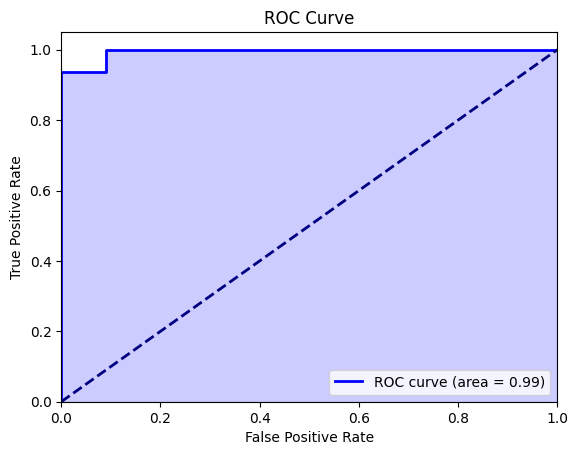

In [238]:
# Use the FPR and TPR arrays from roc_curve (cell 8)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print(thresholds)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##### Classification of Digits Dataset using Logistic Regression #####

In [239]:
digits = load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [240]:
X_digits, y_digits = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=0)

In [241]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [242]:
clf.score(X_test, y_test)

0.9533333333333334

In [243]:
# coefficients
coefficients = clf.coef_
coefficients.shape

(10, 64)

In [244]:
y_pred = clf.coef_ @ X_test.T
y_pred = np.argmax(y_pred, axis=0)

In [245]:
y_pred_1= clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


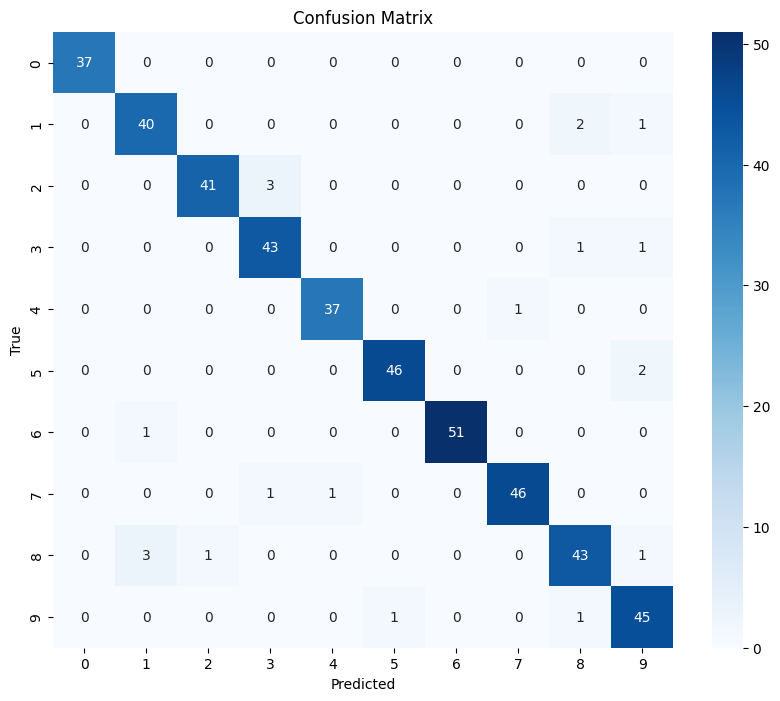

In [246]:
cm = confusion_matrix(y_test, y_pred_1)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [247]:
# saving this model as pickle file
import pickle
with open('models/logistic_regression_digits.pkl', 'wb') as f:
    pickle.dump(clf, f)
# Load the model from the pickle file
with open('models/logistic_regression_digits.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Checking if linear regression can be used for classification tasks. With Softmax activation function, it can be used for multi-class classification.

```python

score: 0.4
All predictions: [0 0 1 0 1 1 1 1 1 0]


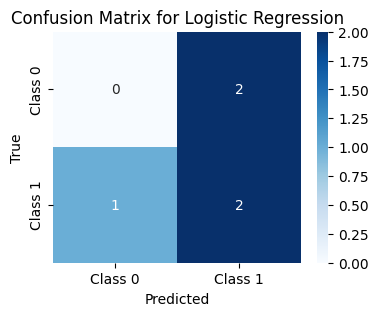

In [248]:
X = np.array([[1.9],
            [1.3],
            [3.5],
            [1.2],
            [9.5],
            [2.5],
            [7.5],
            [3.2],
            [4.2],
            [1.8],
        ])  # Each value is a sample with 1 feature
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X[:5], y[:5])
y_pred = clf.predict(X[5:])
print(f"score: {clf.score(X[5:], y[5:])}")
y_all_pred = clf.predict(X[:])
print(f"All predictions: {y_all_pred}")
cm = confusion_matrix(y[5:], y_pred)
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

All predictions: [0 0 1 0 1 0 1 1 1 0]
score: 0.60


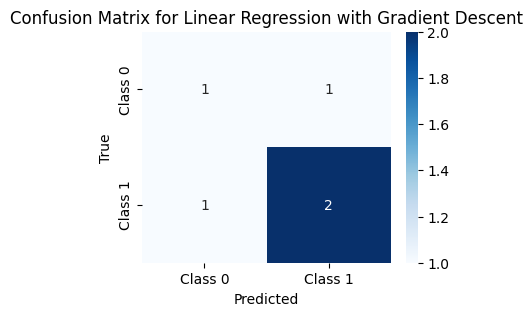

In [249]:
from sklearn.linear_model import LinearRegression
# linear regression from scratch using gradient descent
# X = np.array([[1.9],
#             [1.3],
#             [3.5],
#             [1.2],
#             [9.5],
#             [2.5],
#             [2.2],
#             [3.2],
#             [3.5],
#             [1.2]])  # Each value is a sample with 1 feature
# y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_predicted = np.dot(X, self.weights) + self.bias
        
        error = [y_predicted - y,]
        for _ in range(1, self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.sum(np.dot(X.T, (y_predicted - y)))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(y)  # Apply sigmoid to get probabilities
        
        return y_pred >= 0.60
# Example usage
my_lr_model = LinearRegressionGD(learning_rate=0.01, n_iterations=30)
my_lr_model.fit(X[:5], y[:5])
y_pred = my_lr_model.predict(X[5:])

y_all_pred = my_lr_model.predict(X[:])
ones = np.ones_like(y_all_pred)
# convert boolean predictions to 0 and 1
y_all_pred = np.where(y_all_pred, ones, 1 - ones) 
print(f"All predictions: {y_all_pred}")
print(f"score: {accuracy_score(y[5:], y_pred):.2f}")
# confusion matrix
cm = confusion_matrix(y[5:], y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Linear Regression with Gradient Descent')
plt.show()
# Visualizing the predictions


## Decision Trees

In [250]:
import numpy as np

# Feature options
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
subjects = ['me', 'you', 'they', 'us', 'them', 'all']

# Generate 100 samples
np.random.seed()  # for reproducibility
X = np.array([[np.random.choice(colors), np.random.choice(subjects)] for _ in range(100)])

# Generate target labels randomly between 0 and 1
y = np.random.randint(0, 2, size=100)


In [251]:
# label encoding
df = pd.DataFrame(X, columns=['color', 'person'])
df['label'] = y


In [252]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [253]:
for col in df.columns:
    df[col] = le.fit_transform(df[col]) 


In [254]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  


In [255]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[['color', 'person']], df['label'], test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [256]:
clf.score(X_test, y_test)

0.4

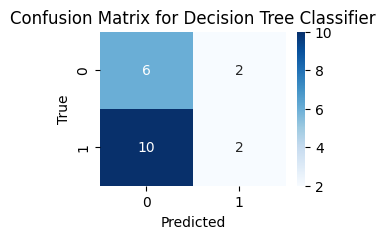

In [261]:
# confusion matrix
y_pred = clf.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


0.4


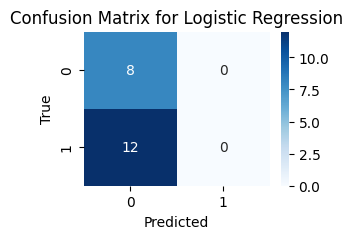

In [262]:
logR = LogisticRegression(max_iter=200)
logR.fit(X_train, y_train)
print(logR.score(X_test, y_test))

# confusion matrix for logistic regression
y_pred = logR.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
